In [28]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [29]:
# setting up the data files
with open('uspsdata.txt') as inputFile:
    X = [map(float, line.strip('\n').split("\t")) for line in inputFile]
X = pd.DataFrame(data=X)


with open('uspscl.txt') as inputFile:
    y = [int(line.strip('\n')) for line in inputFile]
y = pd.DataFrame(data=y, columns=['Target'])

df = pd.concat([X, y], axis=1, ignore_index=False)

In [30]:
# the target class is already perfectly balanced

df.Target.value_counts()

 1    100
-1    100
Name: Target, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [32]:
resub_res = []
gen_res = []

for c_exp in range(-12, 3):
    lsvm_clf = LinearSVC(C=10**c_exp, random_state=0)
    lsvm_clf.fit(X_train, y_train)
    y_pred_sub = lsvm_clf.predict(X_train)
    y_pred_gen = lsvm_clf.predict(X_test)

    resub_res.append((10**c_exp, 1-accuracy_score(y_train, y_pred_sub)))
    gen_res.append((10**c_exp, 1-accuracy_score(y_test, y_pred_gen)))

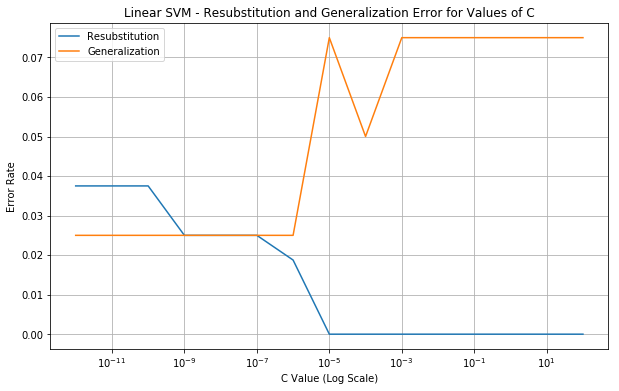

In [39]:
figure(figsize=(10,6))
plt.semilogx(*zip(*resub_res))
plt.semilogx(*zip(*gen_res))
plt.xlabel("C Value (Log Scale)")
plt.ylabel("Error Rate")
plt.title("Linear SVM - Resubstitution and Generalization Error for Values of C")
plt.grid()
plt.legend(['Resubstitution', 'Generalization'])
plt.show()

In [34]:
def frange(start, stop, by):
    while start <= stop:
        yield start
        start += by

In [35]:
def gridSVM(C_range, sig_range):
    z = []
    for i in range(0, len(sig_range)):
        partial = []
        for j in range(0, len(C_range)):
            clf = SVC(kernel='rbf', C=10**C_range[j], gamma=1./(2*sig_range[i]))
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_train)
            partial.append(1-accuracy_score(y_train, y_pred))
        z.append(partial)
    return z

In [45]:
x_resub = np.arange(-20., 15., 1)
y_resub = np.array([10**x for x in frange(0. ,30. , 1)])

xi, yi = np.meshgrid(x_resub, y_resub)
z_resub = gridSVM(x_resub, y_resub)

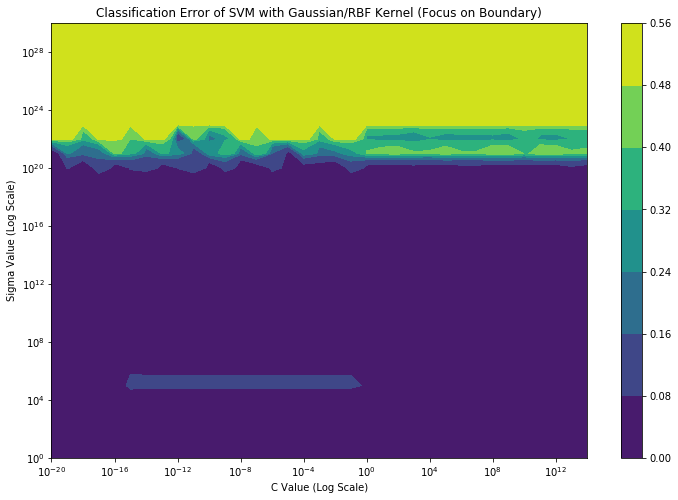

In [48]:
figure(figsize=(12,8))
plt.contourf(10**xi, yi, z_resub)
plt.semilogx()
plt.semilogy()
plt.xlabel('C Value (Log Scale)')
plt.ylabel('Sigma Value (Log Scale)')
plt.colorbar()
plt.title("Classification Error of SVM with Gaussian/RBF Kernel (Focus on Boundary)")
plt.show()

#### Linear vs Non-linear SVM resubstitution and generalization performance

In [22]:
nl_SVM = SVC(kernel="rbf", C=10, gamma=1./(2*10**5))
l_SVM = LinearSVC(C=10**-6, random_state=0)

In [23]:
nl_SVM.fit(X_train, y_train)
l_SVM.fit(X_train, y_train)

LinearSVC(C=1e-06, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [24]:
print "Non-linear SVM resubstitution accuracy =", \
accuracy_score(y_train, nl_SVM.predict(X_train))

print "Linear SVM resubstitution accuracy = ", \
accuracy_score(y_train, l_SVM.predict(X_train))

Non-linear SVM resubstitution accuracy = 1.0
Linear SVM resubstitution accuracy =  0.98125


In [25]:
print "Non-linear SVM generalization accuracy =", \
accuracy_score(y_test, nl_SVM.predict(X_test))

print "Linear SVM generalization accuracy = ", \
accuracy_score(y_test, l_SVM.predict(X_test))

Non-linear SVM generalization accuracy = 0.975
Linear SVM generalization accuracy =  0.975
